Dataset preview:
                                          Event Name  \
0         Poster of concerts and events in Baku 2024   
1  Tickets to the Anime & Comics Cosplay Festival...   
2  Tickets for the Sarışınlar Party in Baku, Sept...   
3  Tickets for the concert “Mahnı24 ulduzların hi...   
4  Tickets for the concert Estrada - Symphonic Or...   

                                            Venue  Event Date  Price  \
0               Palace Named After Heydar Aliyev   2024-10-03     50   
1                                    Nizami Kino   2024-06-30    210   
2                                      East Town   2024-09-29     50   
3                             Baku Music Academy   2024-09-01    180   
4  Rashid Beybutov Azerbaijan State Song Theater   2024-11-11     80   

                            Keywords  
0  Poster, of, concerts, and, events  
1        Jun, 30,, 2024, ..., Ticket  
2        Sep, 29,, 2024, ..., Ticket  
3         Sep, 1,, 2024, ..., Ticket  
4        Nov, 11,,

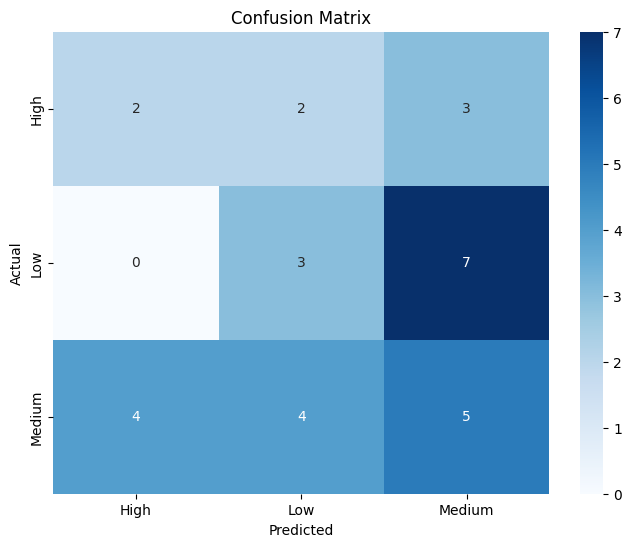

<ipython-input-27-4cfd71ee5dce>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis', hue=None)


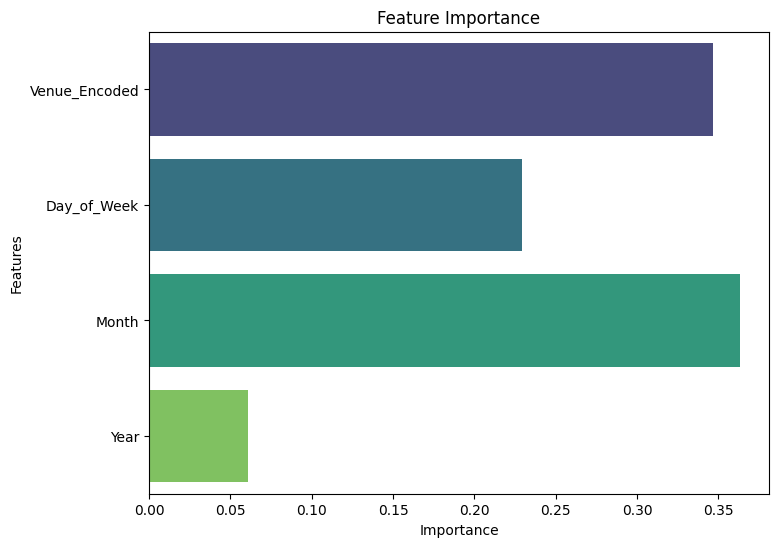


Accuracy Score: 0.3333333333333333


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'data/processed_data_team_26.csv'
df = pd.read_csv(file_path)

# Preview the data
print("Dataset preview:")
print(df.head())

# Data Preprocessing

# Encoding categorical variables
le_venue = LabelEncoder()
df['Venue_Encoded'] = le_venue.fit_transform(df['Venue'])

# Feature Engineering: Create a target variable
def categorize_price(price):
    if price < 100:
        return 'Low'
    elif 100 <= price <= 200:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Price'].apply(categorize_price)

# Encoding target variable
le_price = LabelEncoder()
df['Price_Category_Encoded'] = le_price.fit_transform(df['Price_Category'])

# Extract more features from 'Event Date'
df['Event Date'] = pd.to_datetime(df['Event Date'])
df['Day_of_Week'] = df['Event Date'].dt.dayofweek
df['Month'] = df['Event Date'].dt.month
df['Year'] = df['Event Date'].dt.year

# Select features and target
X = df[['Venue_Encoded', 'Day_of_Week', 'Month', 'Year']]
y = df['Price_Category_Encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model Training
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Model Evaluation
y_pred = clf.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_price.classes_))

# Cross-validation to improve generalization
cv_scores = cross_val_score(clf, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_price.classes_, yticklabels=le_price.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = clf.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis', hue=None)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Accuracy Score (moved to display after graphs)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
